<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/Python_gen_ai_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎓 Original Dataset:
    Maths  Science  English  History  Sports Result
0      88       47       66       59      55   Pass
1      78       66       81       48      69   Pass
2      64       46       67       84      23   Fail
3      92       68       55       43      21   Fail
4      57       88       54       60      25   Fail
5      70       74       86       36      73   Pass
6      88       82       83       54      23   Pass
7      68       46       42       62      73   Fail
8      72       65       76       81      82   Pass
9      60       77       46       41      37   Fail
10     60       56       60       78      63   Pass
11     73       66       48       42      53   Fail
12     85       88       78       81      93   Pass
13     89       69       57       69      81   Pass
14     73       93       43       48      33   Fail

🔢 Scaled Features:
       Maths   Science   English   History    Sports
0   1.198146 -1.465054  0.218530 -0.004228  0.058321
1   0.312816 -0.184255

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


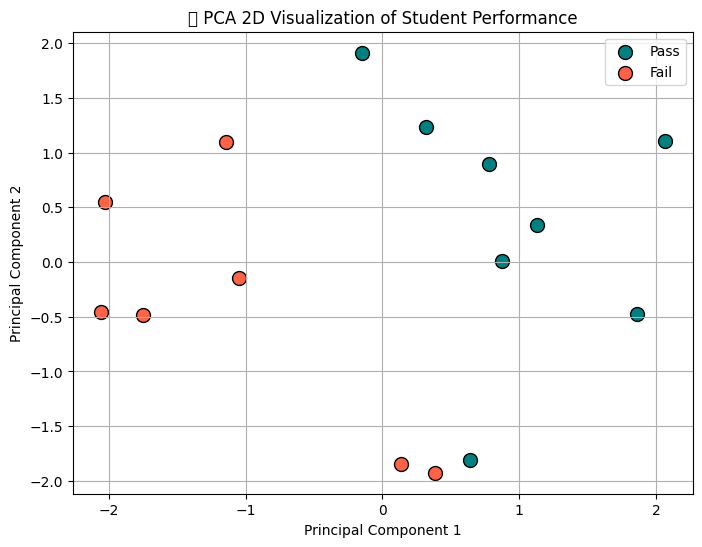

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


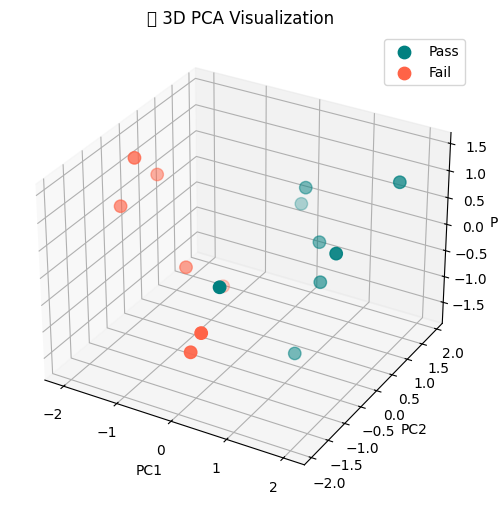

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


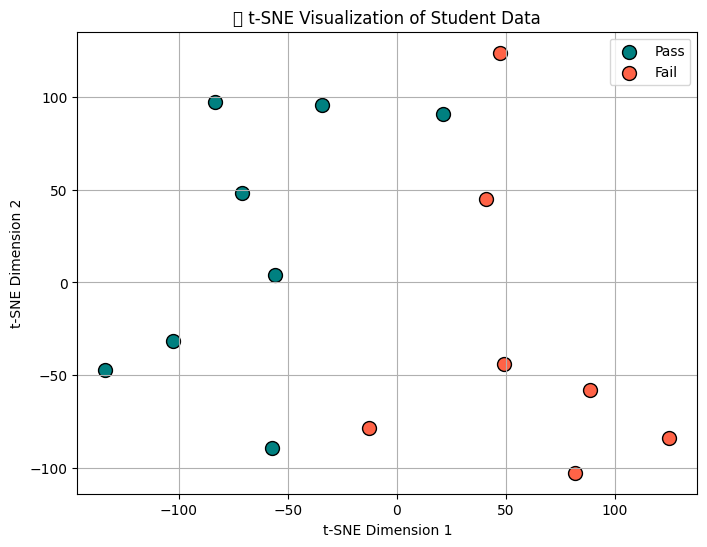


✅ Shape after feature selection: (15, 3)
✅ Shape after PCA: (15, 2)

✅ Pipeline trained successfully!
⚙️ PCA components changed to 3

🔍 PCA Feature Importance (Loadings):
              PC1       PC2
Maths    0.267355  0.592127
Science -0.283418  0.544817
English  0.499693  0.419360
History  0.505331 -0.420350
Sports   0.585784 -0.001763


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


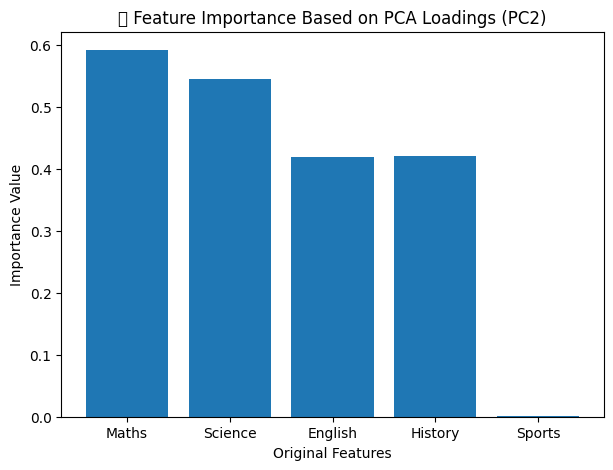

In [1]:
# =============================================================================
# 📊 DIMENSIONALITY REDUCTION & VISUALIZATION
# 1. Apply PCA (Dimensionality Reduction)
# 2. Visualization (2D, 3D, t-SNE)
# 3. Feature Selection + PCA
# 4. Pipeline + Hyperparameters
# 5. PCA Loadings (Feature Importance)
# =============================================================================


# ===============================================
# 📘 STEP 1 — IMPORT LIBRARIES
# ===============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D  # 3D plotting


# ===============================================
# 📊 STEP 2 — CREATE STUDENT DATASET
# ===============================================
np.random.seed(42)

data = {
    'Maths': np.random.randint(50, 100, 15),
    'Science': np.random.randint(45, 95, 15),
    'English': np.random.randint(40, 90, 15),
    'History': np.random.randint(35, 85, 15),
    'Sports': np.random.randint(20, 100, 15)
}

# Target Variable (Pass / Fail)
result = [
    'Pass' if (m + s + e + h + sp) / 5 > 60 else 'Fail'
    for m, s, e, h, sp in zip(
        data['Maths'],
        data['Science'],
        data['English'],
        data['History'],
        data['Sports']
    )
]

df = pd.DataFrame(data)
df['Result'] = result

print("🎓 Original Dataset:")
print(df.head(15))


# ===============================================
# ⚙️ STEP 3 — SCALE THE DATA
# ===============================================
X = df.drop('Result', axis=1)
y = df['Result']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n🔢 Scaled Features:")
print(pd.DataFrame(X_scaled, columns=X.columns).head(15))


# ===============================================
# 🧩 STEP 4 — APPLY PCA (2 COMPONENTS)
# ===============================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Result'] = y

print("\n📉 PCA Reduced Data:")
print(df_pca.head(15))


# ===============================================
# 🎨 STEP 5 — 2D PCA VISUALIZATION
# ===============================================
colors = {'Pass': 'teal', 'Fail': 'tomato'}

plt.figure(figsize=(8, 6))
for label in colors:
    subset = df_pca[df_pca['Result'] == label]
    plt.scatter(
        subset['PC1'],
        subset['PC2'],
        color=colors[label],
        label=label,
        s=100,
        edgecolors='k'
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("🎨 PCA 2D Visualization of Student Performance")
plt.legend()
plt.grid(True)
plt.show()


# ===============================================
# 🎨 STEP 6 — 3D PCA VISUALIZATION
# ===============================================
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

df_pca3 = pd.DataFrame(X_pca3, columns=['PC1', 'PC2', 'PC3'])
df_pca3['Result'] = y

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for label in colors:
    subset = df_pca3[df_pca3['Result'] == label]
    ax.scatter(
        subset['PC1'],
        subset['PC2'],
        subset['PC3'],
        color=colors[label],
        label=label,
        s=80
    )

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("🌈 3D PCA Visualization")
plt.legend()
plt.show()


# ===============================================
# 🌌 STEP 7 — t-SNE VISUALIZATION
# ===============================================
tsne = TSNE(
    n_components=2,
    perplexity=5,
    learning_rate=100,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Result'] = y

plt.figure(figsize=(8, 6))
for label in colors:
    subset = df_tsne[df_tsne['Result'] == label]
    plt.scatter(
        subset['Dim1'],
        subset['Dim2'],
        color=colors[label],
        label=label,
        s=100,
        edgecolors='k'
    )

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("🌈 t-SNE Visualization of Student Data")
plt.legend()
plt.grid(True)
plt.show()


# ===============================================
# 🧠 STEP 8 — FEATURE SELECTION + PCA
# ===============================================
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X, y)

print("\n✅ Shape after feature selection:", X_selected.shape)

pca_selected = PCA(n_components=2)
X_final = pca_selected.fit_transform(X_selected)

print("✅ Shape after PCA:", X_final.shape)


# ===============================================
# 🧩 STEP 9 — PIPELINE + HYPERPARAMETERS
# ===============================================
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('model', LogisticRegression())
])

# Encode target
y_num = [1 if val == 'Pass' else 0 for val in y]

pipe.fit(X, y_num)
print("\n✅ Pipeline trained successfully!")

# Change hyperparameter
pipe.set_params(pca__n_components=3)
print("⚙️ PCA components changed to 3")


# ===============================================
# 📊 STEP 10 — PCA LOADINGS (FEATURE IMPORTANCE)
# ===============================================
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)

print("\n🔍 PCA Feature Importance (Loadings):")
print(loadings)

plt.figure(figsize=(7, 5))
plt.bar(loadings.index, abs(loadings['PC2']))
plt.xlabel("Original Features")
plt.ylabel("Importance Value")
plt.title("📊 Feature Importance Based on PCA Loadings (PC2)")
plt.show()
